In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
#import necessary libraries
from igraph import *
import networkx as nx
from tqdm import tqdm
from joblib import Parallel, delayed
from datetime import datetime
from matplotlib import pyplot as plt

In [9]:
# g = Graph(directed=True)
# g
#directed graph
g = nx.DiGraph()

In [10]:
print(g)

DiGraph with 0 nodes and 0 edges


In [11]:
def humanize_unixtime(unix_time):
    time = datetime.fromtimestamp(int(unix_time)).strftime('%d-%m-%Y %H.%M.%S')
    return time

In [12]:
def get_details(input_type, month):
    
    #hashes list to store all the hashes
    details_dict = dict()
    
    #read files
    if input_type == "inputs":
        filename = "/content/drive/MyDrive/Colab Notebooks/Blockchain Data/edges2010/updated/inputs2010_{}.txt".format(str(month+2))
    if input_type == "outputs":
        filename = "/content/drive/MyDrive/Colab Notebooks/Blockchain Data/edges2010/updated/outputs2010_{}.txt".format(str(month+2))

    with open(filename) as file:
        for line in file:
            #split by tab char to get the details present
            line = line.replace('\n', '')
            details = line.split("\t")

            #hash present at the second value
            #append in the list
            details_dict[details[1]] = dict()
            
            if input_type == "inputs":
                details_dict[details[1]]['time'] = details[0]
                details_dict[details[1]]["input"] = details[2:]
                details_dict[details[1]]["human"] = humanize_unixtime(details[0])
                
            if input_type == "outputs":
                details_dict[details[1]]["output"] = details[2:]
                details_dict[details[1]]["time"] = details[0]
                details_dict[details[1]]["human"] = humanize_unixtime(details[0])
            
    return details_dict

In [13]:
#as there is data file for each month
month = 1

#input dict to store all the input details
input_dict = dict()

#output dict to store all the output details
output_dict = dict()

In [14]:
import time
start_time = time.time()

#calling function
inp = Parallel(n_jobs=-1)(delayed(get_details)("inputs", i) for i in tqdm(range(month)))
for d in inp:
    input_dict.update(d)

end_time = time.time()
print("Time taken to read the input file data is {}".format(end_time - start_time))

100%|██████████| 1/1 [00:00<00:00, 82.27it/s]


Time taken to read the input file data is 2.0204403400421143


In [15]:
print("Total details in input dict is: {}".format(len(input_dict)))

Total details in input dict is: 142


In [16]:
input_dict

{'100381': {'human': '11-02-2010 15.00.33',
  'input': ['af02cb26ceb85262229589f35af1b86e916e9a55f39a34e0d3df6519e485953f',
   '0',
   '513492da330fe02e06c2c88ff9c9b94d9d7893b1370f78ec728ca23830aeeca6',
   '0'],
  'time': '1265900433'},
 '101405': {'human': '08-02-2010 12.47.42',
  'input': ['87114', '0'],
  'time': '1265633262'},
 '101524': {'human': '17-02-2010 17.57.09',
  'input': ['616e75d7b59820597ee1ae684867fe36642f44a7471dc152eace52cb3696861d',
   '0',
   '352ab4a1f25a64ad2ea35fd8970f7d291cd31ae84c465d63c6ccf4f0e2a15820',
   '0',
   '17d2e9dbe5866e5a4be3cb17590c937f47d850243660c95ae5328b7437e65822',
   '0',
   'b41c5e0751d96d6549871313239090d74fdeefcb2521b72be6f27eb63f8d432f',
   '0',
   'a4ee55d5773125da6259d9c796087873aefdd9e7be67773d9255c6cc9b948a2f',
   '0',
   'f7b99e3a002c766c28db4c4250d6f98a991ff48bdfef1d8a5c776368eda5273d',
   '0',
   '8e34e7d3192a2536a9a5e2d2b54c8ad7e7b3d620c3ab98f43ca15e8cf7bfd579',
   '0',
   '73ec936bbd0cc79c8b5c022062bbe6b6e6a3fd5e4681283c7f66dfe95

In [17]:
import time
start_time = time.time()

#calling function
inp = Parallel(n_jobs=-1)(delayed(get_details)("outputs", i) for i in tqdm(range(month)))
for d in inp:
    output_dict.update(d)

end_time = time.time()
print("Time taken to read the output file data is {}".format(end_time - start_time))

100%|██████████| 1/1 [00:00<00:00, 1184.16it/s]


Time taken to read the output file data is 0.31162524223327637


In [18]:
print("Total details in output dict is: {}".format(len(output_dict)))

Total details in output dict is: 142


In [19]:
#merge input and output data
for key, value in output_dict.items():
    input_details = input_dict[key]
    output_dict[key]["input"] = input_details["input"]

print("Total details in linked dict is: {}".format(len(output_dict)))

Total details in linked dict is: 142


In [20]:
output_dict

{'100381': {'human': '11-02-2010 15.00.33',
  'input': ['af02cb26ceb85262229589f35af1b86e916e9a55f39a34e0d3df6519e485953f',
   '0',
   '513492da330fe02e06c2c88ff9c9b94d9d7893b1370f78ec728ca23830aeeca6',
   '0'],
  'output': ['19k8nToWwMGuF4HkNpzgoVAYk4viBnEs5D', '10000000000'],
  'time': '1265900433'},
 '101405': {'human': '08-02-2010 12.47.42',
  'input': ['87114', '0'],
  'output': ['1M76MmkkZbTsu2CBmx7QQPH9NsaVprBqxv', '70000000000'],
  'time': '1265633262'},
 '101524': {'human': '17-02-2010 17.57.09',
  'input': ['616e75d7b59820597ee1ae684867fe36642f44a7471dc152eace52cb3696861d',
   '0',
   '352ab4a1f25a64ad2ea35fd8970f7d291cd31ae84c465d63c6ccf4f0e2a15820',
   '0',
   '17d2e9dbe5866e5a4be3cb17590c937f47d850243660c95ae5328b7437e65822',
   '0',
   'b41c5e0751d96d6549871313239090d74fdeefcb2521b72be6f27eb63f8d432f',
   '0',
   'a4ee55d5773125da6259d9c796087873aefdd9e7be67773d9255c6cc9b948a2f',
   '0',
   'f7b99e3a002c766c28db4c4250d6f98a991ff48bdfef1d8a5c776368eda5273d',
   '0',
   '8e

In [21]:
updated_dict = dict(sorted(output_dict.items(), key=lambda item: item[1]['time']))

In [22]:
for key, value in tqdm(updated_dict.items()):
    
    #print("Current transaction hash {}".format(key))
    hash_of_transc = key
    
    
    input_details_of_hash_of_transc = value["input"]
    output_details_of_hash_of_transc = value["output"]
    
    #print("Transaction input details {}".format(input_details_of_hash_of_transc))
    #print("Transaction output details {}".format(output_details_of_hash_of_transc))
    
    #going over all input transactions
    for i in range(0, len(input_details_of_hash_of_transc), 2):
        
        input_hash = input_details_of_hash_of_transc[i]
        output_index = input_details_of_hash_of_transc[i+1]
        
        #print(input_hash)
        #print(output_index)
        if input_hash not in updated_dict.keys():
            #g.add_vertex(input_hash)
            #print("no address")
            pass
        else:
            #g.add_vertex(input_hash)
            #get output details of that input transaction
            get_amounts = updated_dict[input_hash]["output"]
            
            #print(get_amounts)
            address = get_amounts[int(output_index)]
            amount = get_amounts[2*int(output_index)+1]
            
            
            #add input transaction node
            g.add_node(input_hash, s='s', label='transaction', color="r")
            
            #add address node
            g.add_node(address, s ='s', label='address', color="b")
            
            #add output transaction node
            g.add_node(hash_of_transc, s='o', label='transaction', color="r")
            
            #add edge between input transaction and address
            g.add_edge(input_hash, address, weight=int(amount))
            
            #add edge between address and output transaction
            g.add_edge(address, key, weight=int(amount))

        
            #g.add_edge(input_hash, key, weight=amount)
            #g.add_edge(input_hash, key)
            #g.es["weights"] = amount

100%|██████████| 142/142 [00:00<00:00, 15510.99it/s]


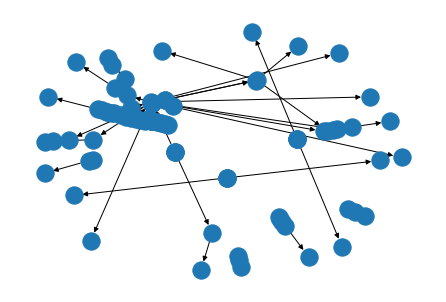

In [23]:
import matplotlib.pyplot as plt
nx.draw(g)

import pyvis

In [28]:
from pyvis.network import Network

In [29]:
net = Network(notebook = True)

In [30]:
net.from_nx(g)

In [37]:
net.show("/content/drive/MyDrive/bitcoinAddressTransactionGraph.html")